<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---


In [1]:
%matplotlib inline

## Build image pyramids

The pyramid_gaussian function takes an image and yields successive images shrunk by a constant scale factor. Image pyramids are often used, e.g., to implement algorithms for denoising, texture discrimination, and scale- invariant detection.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import io
from skimage.transform import pyramid_gaussian

You can read more about Lybua in the <a href="https://blogs.scientificamerican.com/observations/ct-scans-of-baby-mammoths-reveal-ice-age-mystery/">Scientific Amercian</a>. 

In [3]:
image = io.imread("../images/Lyuba-CT_350.tif")
rows, cols = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2))

Construct a composite image of the downsampled Gaussian filtered images.

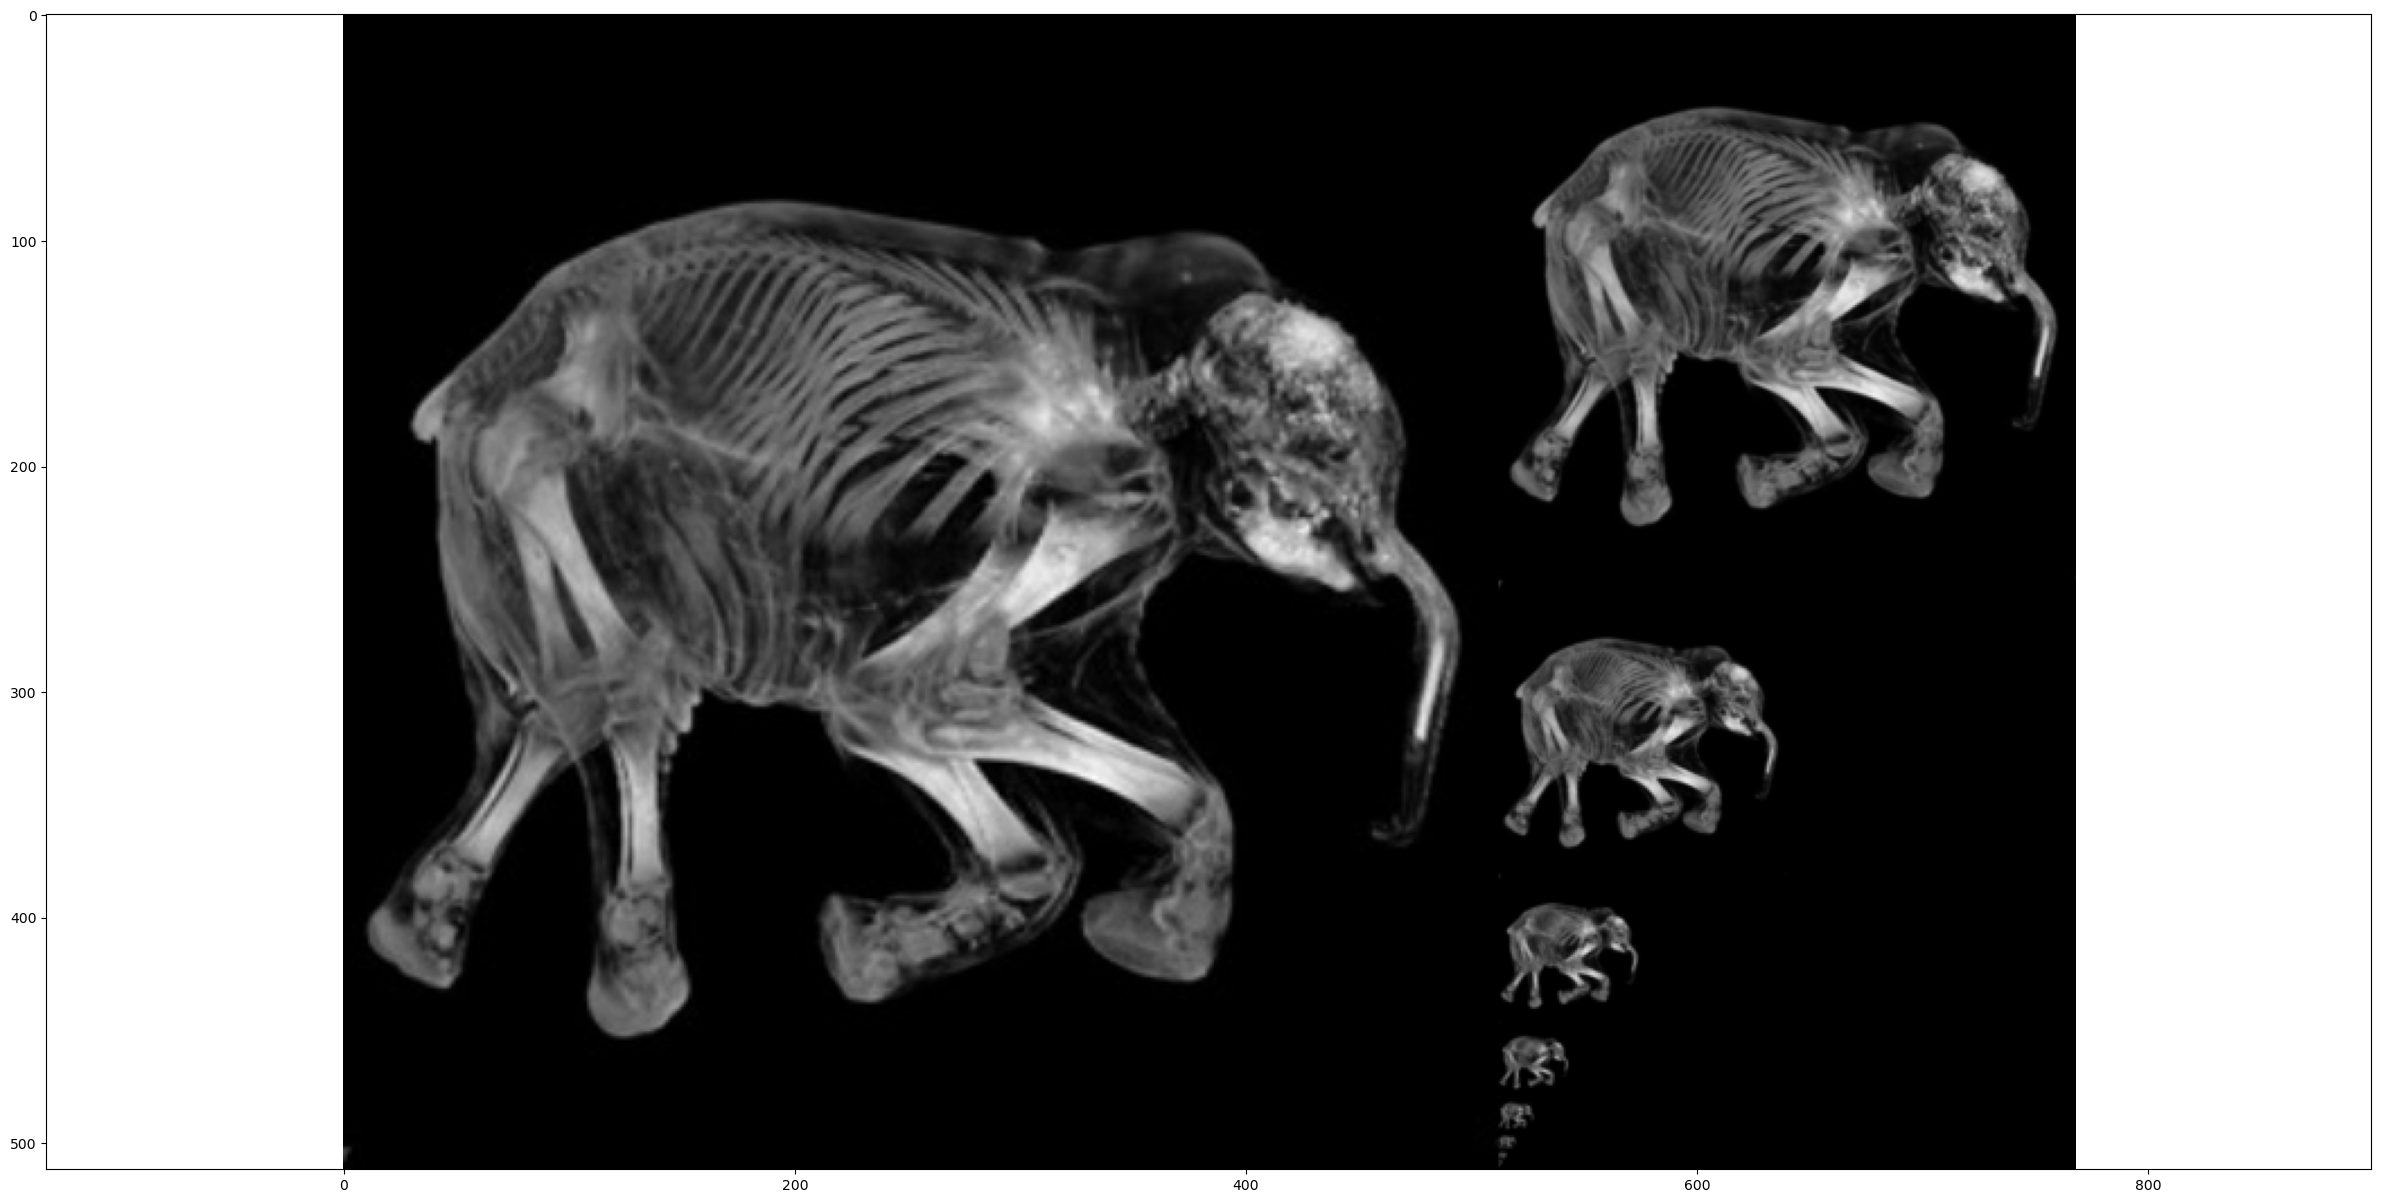

In [4]:
composite_image = np.zeros((rows, cols + cols // 2), dtype=np.double)

composite_image[:rows, :cols] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots(figsize=(30, 15))
ax.imshow(composite_image, cmap='gray')
plt.axis('equal')
plt.show()